In [54]:
import pandas as pd
from scipy.spatial.distance import cosine
import numpy as np
from scipy.sparse import csr_matrix
from __future__ import division
import matplotlib.pyplot as plt
from scipy import fft, arange, signal
%matplotlib inline

In [55]:
train_data = pd.read_csv("train_data.csv")


In [3]:
train_data.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,user_id,action_id,time_50hz
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,dws_1,1
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,dws_1,2
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,dws_1,3
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,dws_1,4
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,dws_1,5


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240503 entries, 0 to 1240502
Data columns (total 15 columns):
attitude.roll         1240503 non-null float64
attitude.pitch        1240503 non-null float64
attitude.yaw          1240503 non-null float64
gravity.x             1240503 non-null float64
gravity.y             1240503 non-null float64
gravity.z             1240503 non-null float64
rotationRate.x        1240503 non-null float64
rotationRate.y        1240503 non-null float64
rotationRate.z        1240503 non-null float64
userAcceleration.x    1240503 non-null float64
userAcceleration.y    1240503 non-null float64
userAcceleration.z    1240503 non-null float64
user_id               1240503 non-null int64
action_id             1240503 non-null object
time_50hz             1240503 non-null int64
dtypes: float64(12), int64(2), object(1)
memory usage: 142.0+ MB


In [31]:
train_data["type_1"] = train_data["user_id"].map(str) +"_"+ train_data["action_id"]

In [41]:
temp = list(set(train_data['type_1']))

In [39]:
df = pd.DataFrame()

In [42]:
df[0] = temp

In [45]:
df

,0,act
0,20_sit_5,sit
1,6_sit_13,sit
2,1_wlk_7,wlk
3,14_dws_1,dws
4,8_ups_3,ups
5,13_ups_4,ups
6,18_jog_16,jog
7,7_wlk_15,wlk
8,2_std_14,std
9,6_std_6,std


In [46]:
df["act"] = df[0].apply(lambda x: x.split('_')[1])
grp_data = df.groupby('act')
grp_data.describe()

0                       
    count unique        top freq
act                             
dws    63     63   14_dws_2    1
jog    42     42   11_jog_9    1
sit    42     42   13_sit_5    1
std    42     42   4_std_14    1
ups    63     63   15_ups_4    1
wlk    63     63  18_wlk_15    1

In [7]:
grp_data = train_data.groupby('type_1')

In [9]:
grp_data.count()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,user_id,action_id,time_50hz
type_1,,,,,,,,,,,,,,,
10_dws_1,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678
10_dws_11,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111,1111
10_dws_2,2887,2887,2887,2887,2887,2887,2887,2887,2887,2887,2887,2887,2887,2887,2887
10_jog_16,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
10_jog_9,4397,4397,4397,4397,4397,4397,4397,4397,4397,4397,4397,4397,4397,4397,4397
10_sit_13,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864,5864
10_sit_5,9397,9397,9397,9397,9397,9397,9397,9397,9397,9397,9397,9397,9397,9397,9397
10_std_14,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267,3267
10_std_6,7147,7147,7147,7147,7147,7147,7147,7147,7147,7147,7147,7147,7147,7147,7147


In [50]:
train_data["time_50hz"].describe()

count    1.240503e+06
mean     2.983018e+03
std      2.585661e+03
min      1.000000e+00
25%      9.940000e+02
50%      2.222000e+03
75%      4.317000e+03
max      1.642400e+04
Name: time_50hz, dtype: float64

In [61]:
train_data["act"] = train_data["action_id"].apply(lambda x: x[:3])
grp_data = train_data.groupby('act')
grp_data.describe()

attitude.pitch                                                    \
             count      mean       std       min       25%       50%   
act                                                                    
dws       115349.0 -1.146617  0.421438 -1.567578 -1.348902 -1.244252   
jog       118294.0 -1.152384  0.312234 -1.568683 -1.366251 -1.231965   
sit       297235.0 -0.336945  0.229572 -1.527474 -0.450818 -0.340816   
std       263976.0 -1.349868  0.117493 -1.569648 -1.437541 -1.378242   
ups       140250.0 -1.154398  0.409534 -1.569092 -1.393190 -1.256170   
wlk       305399.0 -1.132747  0.343090 -1.569974 -1.336546 -1.189836   

                        attitude.roll            ...  userAcceleration.z  \
          75%       max         count      mean  ...                 75%   
act                                              ...                       
dws -1.102140  1.490554      115349.0  0.116266  ...            0.205185   
jog -1.035885  0.461616      118294.0 -0.151093  ...            0.456403   
sit -0.168665  0.163404      297235.0 -0.239690  ...            0.002692   
std -1.262939 -0.952114      263976.0 -0.450290  ...            0.039693   
ups -1.048627  1.567175      140250.0  0.300432  ...            0.168038   
wlk -1.020010  1.564119      305399.0  0.107096  ...            0.395463   

                user_id                                                   
          max     count       mean       std  min  25%   50%   75%   max  
act                                                                       
dws  4.866772  115349.0  10.985826  6.001622  1.0  6.0  11.0  16.0  21.0  
jog  8.125357  118294.0  10.639424  6.075539  1.0  5.0  10.0  16.0  21.0  
sit  0.876057  297235.0  10.849382  6.116228  1.0  6.0  11.0  16.0  21.0  
std  1.269990  263976.0  11.252512  6.189044  1.0  6.0  11.0  17.0  21.0  
ups  2.482116  140250.0  11.004549  5.947195  1.0  6.0  11.0  16.0  21.0  
wlk  4.352533  305399.0  10.908896  6.044829  1.0  6.0  11.0  16.0  21.0  

[6 rows x 112 columns]

In [48]:
grp_data.describe()

0                       
    count unique        top freq
act                             
dws    63     63   14_dws_2    1
jog    42     42   11_jog_9    1
sit    42     42   13_sit_5    1
std    42     42   4_std_14    1
ups    63     63   15_ups_4    1
wlk    63     63  18_wlk_15    1

In [22]:
train_data["action_id"].apply(lambda x: x[:3])

0          dws
1          dws
2          dws
3          dws
4          dws
5          dws
6          dws
7          dws
8          dws
9          dws
10         dws
11         dws
12         dws
13         dws
14         dws
15         dws
16         dws
17         dws
18         dws
19         dws
20         dws
21         dws
22         dws
23         dws
24         dws
25         dws
26         dws
27         dws
28         dws
29         dws
          ... 
1240473    wlk
1240474    wlk
1240475    wlk
1240476    wlk
1240477    wlk
1240478    wlk
1240479    wlk
1240480    wlk
1240481    wlk
1240482    wlk
1240483    wlk
1240484    wlk
1240485    wlk
1240486    wlk
1240487    wlk
1240488    wlk
1240489    wlk
1240490    wlk
1240491    wlk
1240492    wlk
1240493    wlk
1240494    wlk
1240495    wlk
1240496    wlk
1240497    wlk
1240498    wlk
1240499    wlk
1240500    wlk
1240501    wlk
1240502    wlk
Name: action_id, Length: 1240503, dtype: object

In [23]:
train_data["act"] = train_data["action_id"].apply(lambda x: x[:3])

In [51]:
train_data.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,user_id,action_id,time_50hz,type_1,act
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,dws_1,1,1_dws_1,dws
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,dws_1,2,1_dws_1,dws
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,dws_1,3,1_dws_1,dws
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,dws_1,4,1_dws_1,dws
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,dws_1,5,1_dws_1,dws


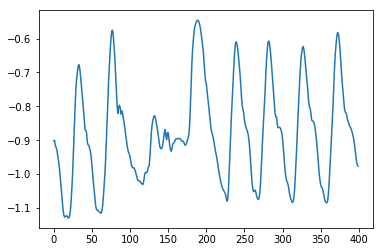

In [53]:
GAN_Input = train_data[(train_data['act']=='ups')]
GAN_Input = GAN_Input.reset_index(drop=True)
input_X = GAN_Input['attitude.pitch']
plt.plot(input_X[0:400])

In [ ]:
data_subject_info = pd.read_csv("data_subjects_info.csv")

# BMI 지수를 category 화 하여 return 하는 함수

### input : weight , height
### output : 
###      0 : underweight 
###      1 : normal 
###      2 : overweight 
###      3 : obese 

In [ ]:
def makeBMIToCategory(weight , height):
    bmi = round(weight*100/ (height * height), 1)
    ret = 0
    if bmi <= 18.5:
        ret = 0
    elif bmi > 18.5 and bmi < 25:
         ret = 1
    elif bmi > 25 and bmi < 30:
         ret = 2
    elif bmi > 30:
         ret = 3
    else:
        ret = -1        
    return ret

In [56]:
x_train = train_data.drop(["action_id"]
                       , axis = 1)
y_train = train_data["action_id"].apply(lambda x:x[:3])

In [57]:
x_train.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,user_id,time_50hz
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,1
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,2
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,3
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,4
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,5


In [58]:
y_train.head()

0    dws
1    dws
2    dws
3    dws
4    dws
Name: action_id, dtype: object

In [59]:
print(x_train.size , y_train.size)

17367042 1240503


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import validation_curve

C_params = np.logspace(-6, 3, 10)
clf_svc = LinearSVC(random_state = 12)

train_scores, test_scores = validation_curve(
    clf_svc, x_train, y_train,
    param_name = "C", param_range = C_params,
    cv = 3, scoring = "accuracy", n_jobs = -1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# Zero Crossing

$X' = X - mean X$

$ period = \sum_{i=0}^N( i - sig_{i} ) / ( sig_{i+1} - sig_{i}))/N$

In [ ]:
from matplotlib.mlab import find
def freq_zero_crossing(sig, fs):
    """
    Frequency estimation from zero crossing method
    sig - input signal
    fs - sampling rate
    
    return: 
    dominant period
    """
    # Find the indices where there's a crossing
    indices = find((sig[1:] >= 0) & (sig[:-1] < 0))

    # Let's calculate the real crossings by interpolate
    crossings = [i - sig[i] / (sig[i+1] - sig[i]) for i in indices]
    
    # Let's get the time between each crossing
    # the diff function will get how many samples between each crossing
    # we divide the sampling rate to get the time between them
    delta_t = np.diff(crossings) / fs
    
    # Get the mean value for the period
    period = np.mean(delta_t)
    
    return period

In [ ]:
train_data = pd.read_csv("train_data.csv")
walk_1 = train_data[(train_data["action_id"] == 'wlk_15') & (train_data['user_id']==1)]

In [ ]:
walk_1 = walk_1.reset_index(drop=True)

In [ ]:
temp = walk_1["attitude.roll"]

In [ ]:
mean = temp.mean()
temp = np.array(list(map(lambda x : x-mean , temp)))

In [ ]:
fs = 50
period_from_zero_crossing = freq_zero_crossing(temp, fs)
print('The period estimation is %.1f days'%(period_from_zero_crossing))

f : ndarray , Array of sample frequencies.

Pxx : ndarray , Power spectral density or power spectrum of x.

In [ ]:
f, Pxx = signal.periodogram(temp, fs = fs, window='hanning', scaling='spectrum')

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(f, Pxx)
plt.xlim(0, )
plt.yscale('log')
plt.xlabel('Frequ25ency (cycles/sec)')
plt.ylabel('Spectrum Amplitude')

# print the top 6 period in the signal

In [ ]:
for amp_arg in np.argsort(np.abs(Pxx))[::-1][0:6]:
    day = 1 / f[amp_arg]
    print(day , f[amp_arg])

In [ ]:
from statsmodels import api as sm

In [ ]:
# get the autocorrelation coefficient
acf = sm.tsa.acf(temp, nlags=len(temp))

In [ ]:
plt.figure(figsize = (10, 8))
lag = arange(len(temp)) / 2. / 24.
plt.plot(lag, acf)
plt.xlim((0, 30))
plt.xlabel('Lags (secs)')
plt.ylabel('Autocorrelation')

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(lag, acf)
plt.xlim((0, 30))
plt.xlabel('Lags (days)')
plt.ylabel('Autocorrelation')

# Using FFT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy import fft
x = walk_1["attitude.roll"]
x = x - np.mean(x)
fs = 50

f, Pxx = signal.welch(x, fs, nperseg=1024)
f_res, Pxx_res = signal.welch(x, fs, nperseg=2048)

plt.subplot(3,1,1)
plt.plot(x)

plt.subplot(3,1,2)
plt.plot(f, Pxx)
plt.xlim([0, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')

plt.subplot(3,1,3)
plt.plot(f_res, Pxx_res)
plt.xlim([0, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')

plt.show()

Hn = fft.fft(x)
freqs = fft.fftfreq(len(Hn), 1/fs)
idx = np.argmax(np.abs(Hn))
freq_in_hertz = freqs[idx]
print ('Main freq:', freq_in_hertz)
print ('RMS amp:', np.sqrt(Pxx.max()))